# 自然言語処理入門
## 【問題1】BoWとN-gram(手計算)
BoW : 構造は全て無視し、「どの単語が含まれているか」のみに注目したのが、bag-of-words

N-gram：n個の単語またはn個の文字で区切る

文1: 今撮影中で〜す！

文2: 今休憩中で〜す(^^)

文3: 今日ドラマ撮影で〜す！

文4: 今日、映画瞬公開で〜す！！！

In [2]:
import pandas as pd
#BoW(1-gram)
vocabulary = ["今", "撮影", "中", "です", "休憩", "今日", "ドラマ", "映画", "瞬", "公開"]
ms_kk_texts = ["今撮影中です", "今休憩中です", "今日ドラマ撮影です", "今日映画瞬公開です"]
texts_vec = [[1,1,1,1,0,0,0,0,0,0],[1,0,1,1,1,0,0,0,0,0],[0,1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,0,1,1,1]]

df_bow_1gram = pd.DataFrame(data = texts_vec, columns = vocabulary, index = ms_kk_texts)
df_bow_1gram

,今,撮影,中,です,休憩,今日,ドラマ,映画,瞬,公開
今撮影中です,1,1,1,1,0,0,0,0,0,0
今休憩中です,1,0,1,1,1,0,0,0,0,0
今日ドラマ撮影です,0,1,0,1,0,1,1,0,0,0
今日映画瞬公開です,0,0,0,1,0,1,0,1,1,1


In [3]:
#BoW(2-gram)
vocabulary = ["今撮影", "撮影中", "中です", "今休憩", "休憩中", "今日ドラマ", "ドラマ撮影","撮影です",
                    "今日映画", "映画瞬", "瞬公開", "公開です"]
ms_kk_texts = ["今撮影中です", "今休憩中です", "今日ドラマ撮影です", "今日映画瞬公開です"]
texts_vec = [[1,1,1,0,0,0,0,0,0,0,0,0],[0,0,1,1,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]]

df_bow_2gram = pd.DataFrame(data = texts_vec, columns = vocabulary, index = ms_kk_texts)
df_bow_2gram

,今撮影,撮影中,中です,今休憩,休憩中,今日ドラマ,ドラマ撮影,撮影です,今日映画,映画瞬,瞬公開,公開です
今撮影中です,1,1,1,0,0,0,0,0,0,0,0,0
今休憩中です,0,0,1,1,1,0,0,0,0,0,0,0
今日ドラマ撮影です,0,0,0,0,0,1,1,1,0,0,0,0
今日映画瞬公開です,0,0,0,0,0,0,0,0,1,1,1,1


## 【問題2】TF-IDF(手計算)
問題1のコーパスを使って、文1〜文4をTFIDFで数値化(ベクトル化)してください。 

問題1と同様、手計算の後見やすい形にしてください。
$$
tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}
$$

In [4]:
vocabulary = ["今", "撮影", "中", "です", "休憩", "今日", "ドラマ", "映画", "瞬", "公開"]
ms_kk_texts = ["今撮影中です", "今休憩中です", "今日ドラマ撮影です", "今日映画瞬公開です"]
texts_vec = [[0.25,0.25,0.25,0.25,0,0,0,0,0,0],[0.25,0,0.25,0.25,0.25,0,0,0,0,0],
                 [0,0.25,0,0.25,0,0.25,0.25,0,0,0],[0,0,0,0.2,0,0.2,0,0.2,0.2,0.2]]

df_bow_1gram = pd.DataFrame(data = texts_vec, columns = vocabulary, index = ms_kk_texts)
df_bow_1gram

,今,撮影,中,です,休憩,今日,ドラマ,映画,瞬,公開
今撮影中です,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.0,0.0,0.0
今休憩中です,0.25,0.00,0.25,0.25,0.25,0.00,0.00,0.0,0.0,0.0
今日ドラマ撮影です,0.00,0.25,0.00,0.25,0.00,0.25,0.25,0.0,0.0,0.0
今日映画瞬公開です,0.00,0.00,0.00,0.20,0.00,0.20,0.00,0.2,0.2,0.2


## 【問題3】テキストクリーニング(プログラミング)

In [144]:
text_original = "<!everyone> *【スペシャル特典】有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*\n\nこの度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。\n\n```\nRubyMine\n<https://www.jetbrains.com/ruby/>\n\nPyCharm\n<https://www.jetbrains.com/pycharm/>\n```\n\n「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。\n\n期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。\nふるってのご希望をお待ちしております！ :smile:"
text = "<!everyone> *【スペシャル特典】有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*\n\nこの度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。\n\n```\nRubyMine\n<https://www.jetbrains.com/ruby/>\n\nPyCharm\n<https://www.jetbrains.com/pycharm/>\n```\n\n「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。\n\n期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。\nふるってのご希望をお待ちしております！ :smile:"

In [145]:
# 正規表現操作のライブラリ
import re
# re.compileを使うと処理が早くなります
BAD_SYMBOL = re.compile('[\n*`\s]')
text = re.sub(BAD_SYMBOL, '', text)
BAD_SYMBOL = re.compile('<.{1,40}>')
text = re.sub(BAD_SYMBOL, '', text)
BAD_SYMBOL = re.compile('【.{1,40}】')
text = re.sub(BAD_SYMBOL, '', text)
BAD_SYMBOL = re.compile(':.{1,10}:')
text = re.sub(BAD_SYMBOL, '', text)
text


'有償のRubyMineやPyCharmの6ヶ月間100%OFFクーポンをご希望者の方先着100名様に贈呈いたします！この度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。RubyMinePyCharm「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。期限は、2019年3月20日（水）22:00までとさせていただきます。ふるってのご希望をお待ちしております！'

In [146]:
text_original

'<!everyone> *【スペシャル特典】有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*\n\nこの度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。\n\n```\nRubyMine\n<https://www.jetbrains.com/ruby/>\n\nPyCharm\n<https://www.jetbrains.com/pycharm/>\n```\n\n「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。\n\n期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。\nふるってのご希望をお待ちしております！ :smile:'

Tips NLPのLinuxコマンド

これまでpythonでファイルを読み込んで処理をしていましたが、
簡単な作業においてはlinuxコマンドの方がメモリの使用料が半分以下だったりとパフォーマンスが良いです。

詳しく知りたい方はNLP100本ノックで調べてみてください。

## 【問題4】形態素解析

In [153]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
token = t.tokenize(text)

In [173]:
token[0].surface

'有償'

In [176]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
token = t.tokenize(text)
do_list = []
for i in range(len(token)):
    a = token[i].part_of_speech.find('動詞')
    b = token[i].part_of_speech.find('名詞')
    if (a != -1) or (b != -1):
        do_list += [token[i].surface]

In [177]:
do_list

['有償',
 'RubyMine',
 'PyCharm',
 '6',
 'ヶ月',
 '間',
 '100',
 '%',
 'OFF',
 'クーポン',
 'ご',
 '希望',
 '者',
 '方',
 '先着',
 '100',
 '名',
 '様',
 '贈呈',
 'いたし',
 'ます',
 '度',
 'RubyMine',
 'PyCharm',
 'メーカー',
 'で',
 'ある',
 'JetBrains',
 '社',
 'クーポン',
 'コード',
 '提供',
 '交渉',
 '実り',
 '100',
 'クーポン',
 'いただく',
 'こと',
 'でき',
 'まし',
 'た',
 'RubyMinePyCharm',
 'ご',
 '希望',
 '方',
 '手',
 '挙げ',
 '方式',
 'ご',
 '希望',
 '方',
 '投稿',
 '手',
 'あげ',
 'スタンプ',
 'クリック',
 'し',
 'ください',
 '期限',
 '2019',
 '年',
 '3',
 '月',
 '20',
 '日',
 '水',
 '22',
 ':',
 '00',
 'さ',
 'せ',
 'いただき',
 'ます',
 'ご',
 '希望',
 'お待ち',
 'し',
 'おり',
 'ます']

## 【問題5】ニュースの分析
以下の流れでニュースを分析してください。

- まずどんなニュースなのか読んでみる
- 出現単語をカウントして分析する
- テキストをクリーニングする
- BoW + TFIDFでベクトル化する
- cos類似度を用いて10個以上の文書対を比較する
- 別の類似度手法を使って5と同様のことをする
- なぜそのような結果になったのか考察する

In [187]:
# livedoorニュースの説明を表示
!cat text/README.txt

livedoor ニュースコーパス


概要
-----------------
本コーパスは、NHN Japan株式会社が運営する「livedoor ニュース」のうち、下記のクリエイティブ・コモンズ
ライセンスが適用されるニュース記事を収集し、可能な限りHTMLタグを取り除いて作成したものです。

- トピックニュース
  http://news.livedoor.com/category/vender/news/
- Sports Watch
  http://news.livedoor.com/category/vender/208/
- ITライフハック
  http://news.livedoor.com/category/vender/223/
- 家電チャンネル
  http://news.livedoor.com/category/vender/kadench/
- MOVIE ENTER
  http://news.livedoor.com/category/vender/movie_enter/
- 独女通信
  http://news.livedoor.com/category/vender/90/
- エスマックス
  http://news.livedoor.com/category/vender/smax/
- livedoor HOMME
  http://news.livedoor.com/category/vender/homme/
- Peachy
  http://news.livedoor.com/category/vender/ldgirls/

収集時期：2012年9月上旬


ライセンス
-----------------
各記事ファイルにはクリエイティブ・コモンズライセンス「表示 - 改変禁止」
（http://creativecommons.org/licenses/by-nd/2.1/jp/）が適用されます。
クレジット表示についてはニュースカテゴリにより異なるため、サブディレクトリにある
それぞれの LICENSE.txt をご覧ください。

livedoor はNHN Japan株式会社の登録商標です。


記事ファイルのフォーマット
-----------------
記事ファイルは以下のフォーマットにしたが

In [17]:
# サブフォルダまで賢く読み込んでもらう
from sklearn.datasets import load_files
# encodingをutf-8指定して読み込み
bin_data = load_files('./text', encoding='utf-8')
documents = bin_data.data
# 今回はラベルが無いと仮定してください
# targets = bin_data.target

In [234]:
text = documents[30]
text

'http://news.livedoor.com/article/detail/5863975/\n2011-09-20T15:45:00+0900\n顔に十字架の刺青をもつ、人類史上最強の聖職者\n\u300015世紀にルーマニアのトランシルバニアに実在したヴラド・ツェペシュをモデルにした『ドラキュラ』など、現在もなお世界各地で伝承されるヴァンパイアの存在。人智を超えた能力を備え、鋭い牙で生命の根源とも言われる血を吸い、太陽の光を嫌う等と言われるヴァンパイアは、21世紀の現代になっても絶えること無く語り継がれ、これまでにも多数の映画作品が製作されるなど、世の中の人々を魅了し続けている。そして、2011年9月23日、核兵器により荒廃した世界を舞台に、人類とヴァンパイアの壮絶な戦いを描いた映画『プリースト』が新たに3Dで登場する。\n\n\n人類史上最強、戦う聖職者「プリースト」\n\u3000物語は、人類とヴァンパイアによる永年の戦いの後、荒廃した世界での出来事。ヴァンパイアとの何世紀にも渡る壮絶な戦いを経て、人類は高い防壁で覆われた都市で暮らしていた。ヴァンパイアとの戦いに勝利し、生き残った“伝説の戦士”プリーストはある日、死に絶えたと思われていたヴァンパイアによって兄家族が襲われ、姪が連れ去られたことを知る。今まさに、人類 VS ヴァンパイア、種族の存亡を賭けた新たな戦争が始まろうとしていた—。\n\n\u3000プリーストとは、現実世界の聖職者とは異なり、人類とヴァンパイアとの永年に渡る戦いの中で、時の権力者となった修道会によって、ヴァンパイアの脅威に立ち向かうために訓練された特殊部隊のこと。荒涼とした平原をスーパースピードのバイクで駆り、超人的な戦闘能力と、聖書に隠されたハイパーリアルな武器の数々を操る。演じるのは、本作を手掛けるスコット・スチュワート監督のデビュー作品『レギオン』（2010年公開）で主演を務め、『ダ・ヴィンチ・コード』（2006年公開）の暗殺者シラス役などで知られる、イギリスの演技派ポール・ベタニーである。\n\n\n十字架の刺青は、罪の象徴\n\u3000ヴァンパイアから世界を守るために生涯を捧げ、家族から引き離され、恋愛することも許されないプリースト。戦争のために家族や自分の人格を犠牲にし、もはや自分の名前すらない。しかし、崇高な大義

In [475]:
#出現回数のカウント
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *
token_filters = [TokenCountFilter()]
a = Analyzer(token_filters=token_filters)
dic = {}
for text in documents:
    for k, v in a.analyze(text):
        if k in dic:
            dic[k] = dic[k] + v
        else:
            dic[k] = v

In [478]:
i = 0
for k, v in sorted(dic.items(), key=lambda x: -x[1]):
    print(str(k) + ": " + str(v))
    if i == 300:
        break
    i += 1

の: 207058
、: 206233
。: 136136
に: 131630
を: 126780
が: 116334
は: 112058
て: 101450
で: 84555
た: 83901
 : 79600
と: 76651

: 75755
「: 63155
」: 62506
し: 62485


: 51574
も: 47548
・: 41657
な: 36143
/: 35330
-: 30810
）: 29695
（: 29489
.: 27963
する: 27199
いる: 26871
ない: 25973
　: 24848
こと: 24599
ます: 23614
さ: 22718
だ: 21838
から: 21775
です: 21643
！: 19974
れ: 19894
い: 17936
か: 17580
:: 16201
や: 16179
日: 13651
：: 13616
という: 13517
人: 13277
ある: 13259
ん: 11700
『: 11483
など: 11473
？: 11385
』: 11345
う: 11279
00: 11246
】: 11162
【: 11158
1: 10966
なっ: 10776
よう: 10080
”: 9952
3: 9804
2: 9799
“: 9798
■: 9697
月: 9498
年: 9012
さん: 8748
livedoor: 8605
なる: 8535
://: 8374
http: 8340
com: 8064
できる: 8025
まし: 7986
T: 7813



: 7700
+: 7653
2012: 7604
この: 7583
ね: 7566
news: 7521
detail: 7509
article: 7462
0900: 7368
れる: 7165
その: 7138
ので: 7086
4: 6977
お: 6974
中: 6858
たい: 6669
ば: 6524
的: 6462
まで: 6304
映画: 6248
よ: 6193
として: 6016
5: 5676
…: 5587
あり: 5576
自分: 5548
でき: 5467
日本: 5379
10: 5335
記事: 5235
だけ: 5177
なく: 5026
女性: 4985
円: 4

In [455]:
#出現回数のカウント
#CountVectorizer使用したパターン
from sklearn.feature_extraction.text import CountVectorizer
t_vec = CountVectorizer(min_df=10)
t_vec.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [203]:
bag_of_words = t_vec.transform(documents)

In [207]:
one_hot_vector = bag_of_words.toarray()

In [208]:
feature_names = t_vec.get_feature_names()

In [222]:
import numpy as np
# (行：文書,　列：単語)
print(one_hot_vector.shape)
# 列和(各単語の出現回数)を計算
one_hot_vector_count = np.sum(a=one_hot_vector, axis=0)
word_count_dict = {}
for word, count in zip(t_vec.get_feature_names(), one_hot_vector_count):
    word_count_dict[word] = count

(7376, 4432)


In [232]:
i = 0
for k, v in sorted(word_count_dict.items(), key=lambda x: -x[1]):
     print(str(k) + ": " + str(v))
     i += 1
     if i == 300:
        break

00: 11104
http: 8334
livedoor: 8112
com: 8046
news: 7631
detail: 7499
article: 7461
0900: 7368
2012: 4615
また: 3093
max: 2539
2011: 2420
話題: 2088
エスマックス: 1822
関連記事: 1701
関連リンク: 1367
30: 1227
では: 1205
しかし: 1183
映画: 1124
など: 1116
2010: 1089
twitter: 1057
jp: 1034
on: 1024
phone: 1013
10: 1000
03: 933
11: 888
08: 885
android: 885
05: 874
07: 874
06: 872
smaxjp: 867
記事執筆: 866
でも: 860
55: 837
galaxy: 830
そして: 820
さらに: 802
12: 800
google: 722
aquos: 715
売れ筋チェック: 681
nttドコモ: 648
02: 645
関連情報: 636
04: 634
デジ通: 632
wi: 599
なお: 592
iphone: 574
sports: 561
movie: 556
xperia: 552
sc: 550
公式サイト: 543
ライブドアブログ: 541
09: 540
01: 527
watch: 522
co: 515
ビデオsalon: 510
the: 488
だが: 488
sh: 472
store: 467
06d: 440
htc: 430
今回は: 430
vol: 429
特集: 428
lte: 418
windows: 412
ただ: 406
play: 402
今回: 391
for: 390
虎の巻: 388
知っ得: 387
arrows: 367
価格: 363
optimus: 356
クチコミを見る: 345
so: 335
by: 334
もちろん: 333
amazon: 330
one: 330
ニュース: 330
medias: 320
20: 314
ゼロから始めるスマートフォン: 312
無料: 309
15: 307
fi: 307
ただし: 307
以下: 307
memn0

In [270]:
#クリーニング
import re
def cleaning_list(lists):
    clean_list = []
    for text in lists:
        BAD_SYMBOL = re.compile('^http.{1,100}\n')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('^2.{1,40}\n')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`\s]+')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{1,40}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,40}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,10}:')
        text = re.sub(BAD_SYMBOL, '', text)
        
        clean_list += [text]
    return clean_list

In [271]:
c_documents = cleaning_list(documents)

In [313]:
#BoW + TFIDFでベクトル化する
#参考　https://qiita.com/enta0701/items/87cbe783aeb44ddf41ce
t = Tokenizer()
def japanese_analyzer(string):
    result_list = []
    for token in t.tokenize(string):
        result_list += [token.surface]
    return result_list

In [314]:
#analyzerに分かち書きの関数を渡す
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=japanese_analyzer, min_df=10)
X = vectorizer.fit_transform(c_documents)

In [320]:
X_ar = X.toarray()

In [321]:
feature_names = vectorizer.get_feature_names()

In [325]:
#cos類似度を用いて文書対を比較する
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [367]:
print(cos_sim(X_ar[6], X_ar[4])) #ガールズコレクション　チョコレートキャンペーン
print(cos_sim(X_ar[1226], X_ar[50]))  #プロ野球　フジテレビの番組に関して
print(cos_sim(X_ar[1226],X_ar[2])) #プロ野球　野球選手の恋愛
print(cos_sim(X_ar[1226],X_ar[30])) #プロ野球　プロ野球
print(cos_sim(X_ar[4], X_ar[50]))  #チョコレートキャンペーン　フジテレビの番組に関して

0.268583603270339
0.16263860462530366
0.21621522506806215
0.2659017941984392
0.19189401876182174


同じジャンルの記事だと近くなると予想し、そのような結果になっている。

In [362]:
c_documents[50]

'フジテレビが″愛菜ちゃん頼み″の特番!三冠王死守なるか?12月27日19時からフジテレビ系で「カスペ!愛菜ちゃんの年末大感謝祭！すごーい有名人とドキドキ遠足SP!!」が放送される。内容は、2011年、日本中に笑顔を振りまいてくれた芦田愛菜に様々なサプライズプレゼントを用意するというものだ。芦田は、番組の用意した「ドキドキバス」に乗り込み遠足に出発。彼女にとって憧れの女優である中谷美紀との対面や明石家さんまとの絡みもあるという。またともに大ブレイクした子役・鈴木福とも共演。「♪マル・マル・モリ・モリ！」を一緒に歌って踊り、ラストは今年一番お世話になった「マルモ」こと阿部サダヲとも再会するという。まさに“愛菜ちゃん尽くし”の年末特番だが、ツイッターでは冷めた反応が目立つ。「つまり愛菜ちゃん今年も視聴率あげてくれてありがとう祭てことなの?」「本当に愛菜ちゃんに感謝しているなら少しでも休ましてあげようよ」「（TVに出演させすぎで）可哀想なイメージが強くなっちゃって癒やしどこじゃねぇだろ」といった否定的な声も少なくない。先日、日本テレビの「家政婦のミタ」が視聴率40%を記録し、フジテレビの視聴率年間三冠王の座は危ういと言われている。“数字を持っている”芦田愛菜人気に便乗し年間三冠王を死守できるのか、芦田愛菜よりフジテレビが“ドキドキ”しているのではないだろうか?'

In [366]:
c_documents[2]

'田中＆里田の交際、アプローチは里田からグラビアアイドル・ほしのあき＆騎手・三浦皇成がお互いのブログで交際を認めた日、東北楽天ゴールデンイーグルスのエース・田中将大とタレント・里田まいの交際もまた公のものとなったが、本日30日（火）発売の「週刊アサヒ芸能」（12.9号）では、「マー君を“ナンパ”した里田」との見出しで、両者の交際にまつわる関係者の証言を紹介した。同誌にコメントを寄せた芸能デスクによると、「周囲の事情はさておき、当人たちが盛り上がっているのは確か。結婚も完全に視野に入れているようで、すでに新居を探しているとの話まである」という。また、二人の交際は里田からのアプローチによるものとのことで、前出の芸能デスクは、「2人は昨年末の番組共演時に、里田から猛アタック。『一緒に食事でも』と誘い、春頃にはつきあい始めた。里田は仲のいいスザンヌ（24）、木下優樹菜（22）には、早くから相談していたし、周囲にも浮かれてしゃべりまくっていた。次世代エースをゲットしたわけですから、賞味期限切れ間近の里田にすれば、してやったりでしょう」とも語っている。ちなみに、同じく同誌にコメントする球団関係者は、「高校時代は同じ高校の女子生徒と在学中の3年間、ずっとつきあっていましたね。基本はオクテ。プロ入り後にキャバクラなども覚えましたが、まぁ、モテるタイプではないし、女あしらいも不慣れ。高校時代はかなりワガママで、元カノは苦労が絶えなかったと聞いています。同年代の女より、里田のような姉さんタイプのほうが勝負の世界では向いているケースも多いですからね」と明かしており、この交際も田中にとっては“吉”とした。・週刊アサヒ芸能［ライト版］＜デジタル＞（PC版）・週刊アサヒ芸能（モバイル版）'

In [377]:
#別の類似度手法を使って5と同様のことをする
#相関係数でやりました
print(np.corrcoef(X_ar[6], X_ar[4])[1,0]) #ガールズコレクション　チョコレートキャンペーン
print(np.corrcoef(X_ar[1226], X_ar[50])[1,0])  #プロ野球　フジテレビの番組に関して
print(np.corrcoef(X_ar[1226], X_ar[2])[1,0]) #プロ野球　野球選手の恋愛
print(np.corrcoef(X_ar[1226], X_ar[30])[1,0]) #プロ野球　プロ野球
print(np.corrcoef(X_ar[4], X_ar[50])[1,0])  #チョコレートキャンペーン　フジテレビの番組に関して

#cos_sim類似度の結果
#0.268583603270339
# 0.16263860462530366
# 0.21621522506806215
# 0.2659017941984392
# 0.19189401876182174

0.2626911744069678
0.15676071077531178
0.21051506460130887
0.25978343256436903
0.18621231865407067


相関係数もほぼほぼ同じような結果になりました
当たり前だが、相関係数は同じ特徴が高くないと高くならない。コサイン類似度も特徴同士の距離を合わせたものなので結果は似ているものになると思われる。

In [419]:
#課題が変わったので追加
#あるニュースに一番類似度が近いニュースを出力する関数の作成
def cos_sim2(X_ar, ind, documents):
    result_list = []
    for d in X_ar:
        result_list += [np.dot(X_ar[ind], d) / (np.linalg.norm(d) * np.linalg.norm(X_ar[ind]))]
    result_list = np.array(result_list)
    top2 = np.argsort(-result_list)[:2]
    top_ind = np.where(top2!=ind)[0]
    top = int(top2[top_ind][:1])
    print("一番似ているニュース")
    print("cos類似度: {}".format(result_list[top]))
    print(documents[top])
    print("-------------------------------------------------------")
    print("元のニュース")
    print(documents[ind])

In [434]:
cos_sim2(X_ar,4 , c_documents,)

一番似ているニュース
cos類似度: 0.5004483353715774
クリスマスプレゼントの予算は自分＞彼氏！？LUSHで暖かい贈り物を手作り入浴剤“バスボム”や賞味期限付き天然パックでおなじみのLUSHが、男女500名に対して「クリスマスプレゼント」に関する意識調査を実施、女性のプレゼントにかける予算に関して「自分＞彼氏」という結果が明らかになりました。「今年のクリスマスは、誰にプレゼントを贈りますか？」と聞いたところ、「彼氏・彼女」と答えたのは全体の87％。定番ではありますが、9割近い男女がクリスマスにはプレゼントを交換する予定のようです。男女別に見ると、女性は「恋人以外にもプレゼントを贈る」という人が多いようで、5人に1人が「母親」と「自分」に贈ると回答しています。「彼氏・彼女」へのプレゼントの予算の平均は、男性が「21,806円」、女性が「14,595円」となり、男性が女性を「7,211円」上回る結果が出ました。女性が彼氏に贈るプレゼントの予算が「14,595円」なのに対し、自分に贈るプレゼントの予算は「15,245円」と上回り、女性はクリスマスに関しても“自分へのごほうび”思考が強いようです。「クリスマスプレゼントとして欲しいもの」としては、女性が「彼氏から欲しいもの」として最も多いのは「ジュエリー」（48％）。男性が「彼女から欲しいもの」としては「ファッション雑貨」（28％）が最も多く、それぞれ「贈る予定」のものと一致する結果となっています。また、「クリスマスプレゼントに必要な要素」については男女ともに圧倒的に多かった答えが「相手が喜ぶ」（62％）、そして「気持ちが伝わる」（48％）。さらに「記念になる」（33％）、「クリスマスらしい」（32％）と続き、「ブランド品（1％）、「高価」（1％）という回答を大きく上回りました。「クリスマスプレゼント」は恋人同士だけでなく、友人や家族といった周囲の人に、1年間の感謝の気持ちを込めて贈る物。LUSHでは「聖なる夜に」と「淑女の宝石箱」という2種類のクリスマス限定商品が販売中。大切なあの人に贈ってみてはいかがですか？「聖なる夜に」10,220円（税込）聖なる特別な夜を過ごすために必要なアイテムだけをセレクト。お月様に流れ星、サンタさんに、ケーキ。どれもイヴの夜を素敵に演出してくれそう。オリジナルのキュートなリ

## 【問題6】感情分析
NLP定番の感情分析の経験

英語の処理の実践

In [1]:
# サブフォルダまで自動で読み込んでもらう
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
train_text, train_y = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
test_text, test_y = test_review.data, test_review.target

In [429]:
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [2]:
#クリーニング
import re
def cleaning_list(lists):
    clean_list = []
    for text in lists:
        #BAD_SYMBOL = re.compile('^http.{1,100}\n')
        #text = re.sub(BAD_SYMBOL, '', text)
        #BAD_SYMBOL = re.compile('^2.{1,40}\n')
        #text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`]+')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{1,40}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,40}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,10}:')
        text = re.sub(BAD_SYMBOL, '', text)
        
        clean_list += [text]
    return clean_list

In [3]:
#クリーニング　とりあえず＜br>消したぐらいです
c_train_text = cleaning_list(train_text)
c_test_text = cleaning_list(test_text)

In [16]:
train_text[5]

"The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.<br /><br />Stargate SG1 is currently one of my favorite programs."

In [15]:
c_train_text[5]

"The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.Stargate SG1 is currently one of my favorite programs."

In [4]:
#analyzerに分かち書きの関数を渡す
from sklearn.feature_extraction.text import TfidfVectorizer
v_eng = TfidfVectorizer(min_df=10)
X_train = v_eng.fit_transform(c_train_text)
X_test = v_eng.transform(c_test_text)

In [5]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [11]:
import lightgbm as lgb
import numpy as np
lgb_train = lgb.Dataset(X_train, train_y)
lgb_eval = lgb.Dataset(X_test, test_y, reference=lgb_train)
    # LightGBM のハイパーパラメータ
lgbm_params = {
    # 多値分類問題
    'objective': 'binary',
    "metric":"auc"
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.799811
[2]	valid_0's auc: 0.812065
[3]	valid_0's auc: 0.818549
[4]	valid_0's auc: 0.82364
[5]	valid_0's auc: 0.829741
[6]	valid_0's auc: 0.833456
[7]	valid_0's auc: 0.836286
[8]	valid_0's auc: 0.84196
[9]	valid_0's auc: 0.847671
[10]	valid_0's auc: 0.850573
[11]	valid_0's auc: 0.855445
[12]	valid_0's auc: 0.857364
[13]	valid_0's auc: 0.861463
[14]	valid_0's auc: 0.864226
[15]	valid_0's auc: 0.86717
[16]	valid_0's auc: 0.870446
[17]	valid_0's auc: 0.87343
[18]	valid_0's auc: 0.876334
[19]	valid_0's auc: 0.878705
[20]	valid_0's auc: 0.880493
[21]	valid_0's auc: 0.882295
[22]	valid_0's auc: 0.883806
[23]	valid_0's auc: 0.88607
[24]	valid_0's auc: 0.888171
[25]	valid_0's auc: 0.890503
[26]	valid_0's auc: 0.892218
[27]	valid_0's auc: 0.893738
[28]	valid_0's auc: 0.894969
[29]	valid_0's auc: 0.896222
[30]	valid_0's auc: 0.89758
[31]	valid_0's auc: 0.899192
[32]	valid_0's auc: 0.900503
[33]	valid_0's auc: 0.901678
[34]	valid_0's auc: 0.903249
[35]	valid_0's auc: 0.904514


## 【問題7】分散表現  Word2Vec-skip-gram
分散表現を獲得し、
好きな単語群をt-SNE,PCAなどを用いて可視化してください。
コーパスは自由です。

### - 分布仮説とは何か？

単語の意味はその単語が出現した際の周囲の単語によって決まる

### - 分散表現を得ることのメリットは何か？

単語の意味を捉えたベクトル表現を得ることで、単語間の相関性などを判断、定量化することができる。

### - 上で選んだモデルのメリット、デメリットは何か？
デメリットはcvowより処理は遅い（コンテキストの数だけ損失を求めるため計算コストが高い）

メリットはcbowより精度が高い。低頻出の単語や類推問題の性能はskip-gramの方がいい傾向にあるらしい。

### - なぜそのパラメータを選んだのか？
size(単語ベクトルの次元数)=1000  標準が１００ですが、ニュースは単語数がかなり多いので、少ないとよくないかと思い増やしました

min_count(n回未満登場する単語を破棄)=20,　　単語数が多すぎると処理が遅くなりそうなので

window(学習に使う前後の単語数)=10　前後は多くみた方が文章からの意味を獲得できると予測したので

In [18]:
# ライブドアニュースでやりました
from sklearn.datasets import load_files
# encodingをutf-8指定して読み込み
bin_data = load_files('./text', encoding='utf-8')
documents = bin_data.data
# 今回はラベルが無いと仮定してください
#targets = bin_data.target

In [44]:
import re
def cleaning_list(lists):
    clean_list = []
    for text in lists:
        BAD_SYMBOL = re.compile('^http.{1,100}\n')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('^2.{1,40}\n')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('[\n*`\s「」（）／]+')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('<.{1,40}>')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile('【.{1,40}】')
        text = re.sub(BAD_SYMBOL, '', text)
        BAD_SYMBOL = re.compile(':.{1,10}:')
        text = re.sub(BAD_SYMBOL, '', text)
        
        BAD_SYMBOL = re.compile('[0-9]+')
        text = re.sub(BAD_SYMBOL, 'NUMBER', text)
        
        clean_list += [text]
    return clean_list

In [45]:
c_documents = cleaning_list(documents)

In [46]:
c_documents[7]

'あなたの打たれ強さ度は?イイ女を作る朝型生活など−週間ランキング人間関係をスムーズにするヒントやライフハック、節約ネタなど、今すぐ役立つ情報が詰まったPeachyのライフスタイルカテゴリ。このカテゴリのなかから、NUMBER年NUMBER月NUMBER日〜NUMBER月NUMBER日の間に最も多く読まれた記事TOPNUMBERをご紹介します！第NUMBER位：NUMBER年間洗顔せずお化粧を続けるとこうなる!?NUMBER日分のお化粧を施したらドロドロになってしもうたよあなたはこんなことを考えたことがありますか？私って、NUMBER年にどれくらい化粧品を使っているんだろう？そんな素朴な疑問を、モデルを使って実際に目に見える形にしてしまった、NUMBER人のオランダ人アーティストがいました。彼らの名は、Lernert&Sanderふたりとも男性です！。ただしこのふたりが表現したかったことは、人はNUMBER年に化粧品をどれくらい使うのかではなく、どれくらい化粧品を使えば、人は自然な状態からとんでもない状態になるのかということ。彼らはそうだ！化粧品をNUMBER年分塗り重ねていけば、きっととんでもなくなるはずだ！と、考えたわけです。第NUMBER位：あなたの打たれ強さ度を診断恋がうまくいかなかったり、理不尽なことで上司に怒られたり。生きていると凹むことっていっぱいありますよね。どん底気分のとき、あなたはすぐに回復できる人？それともなかなか立ち直れないほう？恋愛カウンセラー・ゆまさん監修の究極の恋愛科学では、あなたの打たれ強さ度をチェックできる心理テストを公開しています。第NUMBER位：レパートリーに悩むママ必見！夏のカンタン朝ごはんとは？あなたは毎日朝ごはんを食べていますか？何かと慌しい朝。時間がなくて毎日同じメニューなんて方も多いのではないでしょうか。ひとりだと適当にパンやおにぎりをコンビニで購入したり、ダイエットのために朝食を抜くこともあるかもしれませんが、家庭を持っているとそうはいきませんよね。第NUMBER位：いい女は朝を制す！朝型女子NUMBERの習慣おはようございますという挨拶からも気品が漂ってきそうな朝からシャキっと美しい女性、あなたの周りにいませんか？今回はそんな女性たちが実践しているであろう、いい女に欠かせない朝の習慣をまとめてみました。第NUMB

In [106]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
corpus = []
for i in range(7000):
   a = t.tokenize(c_documents[i], wakati=True)
   corpus += [a]

In [113]:
corpus[99]

['嵐',
 '・',
 '櫻井',
 '翔',
 'が',
 'ファン',
 'の',
 '携帯',
 '叩き',
 '落し',
 '騒然',
 'に',
 'ファン',
 '捏造',
 'だ',
 'NUMBER',
 '日',
 '発売',
 'の',
 '週刊',
 '女性',
 'NUMBER',
 '月',
 'NUMBER',
 '日',
 '号',
 'は',
 '、',
 '嵐',
 'の',
 '櫻井',
 '翔',
 'が',
 'ファン',
 'の',
 '携帯',
 '電話',
 'を',
 '手',
 'で',
 '振り払い',
 '撮る',
 'な',
 'と',
 '怒声',
 'を',
 'あげ',
 '、',
 '周囲',
 'が',
 '一時',
 '騒然',
 'し',
 'た',
 'と',
 '報じ',
 '、',
 'ネット',
 '掲示板',
 'で',
 '話題',
 'と',
 'なっ',
 'て',
 'いる',
 '。',
 '同誌',
 'に',
 'よれ',
 'ば',
 '、',
 'NUMBER',
 '月',
 'NUMBER',
 '日',
 'に',
 '生',
 '放送',
 'さ',
 'れ',
 'た',
 '復興',
 'テレビ',
 'みんな',
 'の',
 'チカラ',
 'NUMBER',
 '.',
 'NUMBER',
 '日本テレビ',
 '系',
 'で',
 '福島',
 '県',
 'から',
 'の',
 '帰り',
 '、',
 '東京',
 '駅',
 'で',
 '、',
 '櫻井',
 'が',
 '集まっ',
 'た',
 'ファン',
 'に',
 '携帯',
 'で',
 '写真',
 'を',
 '撮ら',
 'れ',
 'そう',
 'に',
 'なっ',
 'た',
 '際',
 '、',
 'ファン',
 'の',
 '携帯',
 '電話',
 'を',
 '撮る',
 'な',
 'と',
 '振り払い',
 '、',
 'その',
 '携帯',
 'は',
 '床',
 'に',
 '叩き',
 '落とさ',
 'れ',
 'て',
 '現場',
 'が',
 '騒然と',
 'なっ',
 'た',
 'と',
 'いう',
 '。',
 '

In [107]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, size=1000, min_count=20, window=10, sg=1) #sg1がskip-gram

In [172]:
model.most_similar(positive=["北朝鮮"], negative=["核"],topn=20)

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('News', 0.3188955783843994),
 ('長谷部', 0.3148362934589386),
 ('永', 0.31142669916152954),
 ('日曜', 0.3104810118675232),
 ('Going', 0.30385154485702515),
 ('定休', 0.3019334673881531),
 ('修造', 0.2951923906803131),
 ('マリノス', 0.2923283874988556),
 ('Sports', 0.2918791174888611),
 ('ドーム', 0.2845940589904785),
 ('丸山', 0.2798057198524475),
 ('読売', 0.27954912185668945),
 ('渡部', 0.2791171669960022),
 ('初戦', 0.2748373746871948),
 ('対談', 0.2721193730831146),
 ('報道陣', 0.2694065570831299),
 ('松木', 0.2690976858139038),
 ('火曜', 0.26900625228881836),
 ('松岡', 0.2684326171875),
 ('ロッテ', 0.26730018854141235)]

In [134]:
model.most_similar(positive=["野球"], negative=[],topn=20)

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('プロ', 0.6735699772834778),
 ('球団', 0.6484789252281189),
 ('槙原', 0.6232250928878784),
 ('巨人軍', 0.6213372945785522),
 ('巨人', 0.619382381439209),
 ('桑田', 0.6041350364685059),
 ('ドラフト', 0.602125883102417),
 ('最下位', 0.5958892107009888),
 ('克也', 0.5939071774482727),
 ('岩隈', 0.5886052846908569),
 ('TBSSNUMBER', 0.5834661722183228),
 ('阪神', 0.5813466906547546),
 ('金本', 0.5773532390594482),
 ('補強', 0.5725194215774536),
 ('一軍', 0.571388304233551),
 ('ヤクルト', 0.5708335638046265),
 ('WBC', 0.5679587721824646),
 ('栗山', 0.567828357219696),
 ('ラモス', 0.5677706003189087),
 ('江川', 0.5672722458839417)]

In [121]:
model.most_similar("ドコモ")
#スマホの機種名が多い。新商品の記事が多いのでこうなったと思われる。商品名は除外するようにした方が良いかも

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('NTT', 0.7854272127151489),
 ('AQUOSPHONEZETASH', 0.6030123829841614),
 ('GALAXYNEXUSSC', 0.600238025188446),
 ('GALAXYSIISC', 0.5949162840843201),
 ('GALAXYSIILTESC', 0.5814644694328308),
 ('MEDIASPPN', 0.5789546966552734),
 ('AQUOSPHONESH', 0.578346848487854),
 ('AQUOSPHONEsvSH', 0.5776774883270264),
 ('NUMBERDNERV', 0.567022442817688),
 ('MEDIASESN', 0.5633096098899841)]

In [119]:
model.wv["ドコモ"].shape

(1000,)

### 【問題8】自然言語処理の応用事例
現在自然言語処理はどのような企業でどのように活用されているか？ 

東大発ベンチャーストックマーク株式会社　「Asales」

 ##### 社内検索・レコメンド
アポに行く会社の類似の会社などをレコメンドします。アポ先企業と類似した企業への過去の提案資料などを参考にすることで、一から資料を作り直す必要がないため、営業を大きく効率化させることが可能

##### 受失注分析（営業企画向け）
案件のメモや報告書・メールなどのテキストデータから、受失注の”なぜ”を分析。4C等のフレームワークをベースに自社の営業活動における強み・弱みを俯瞰。
下に画像

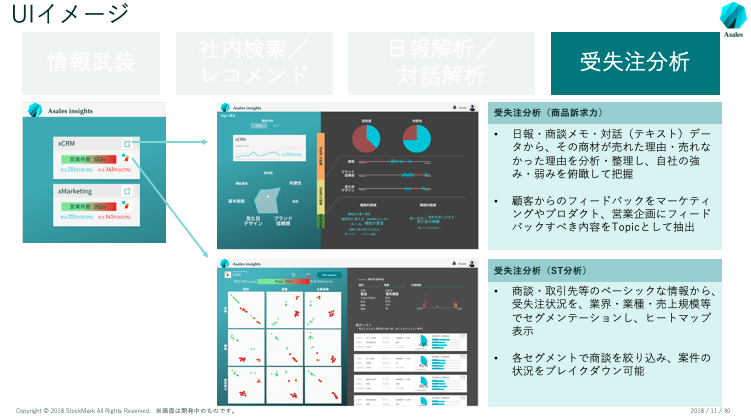

In [122]:
from IPython.display import Image, display_png
display_png(Image("af1c82f71622bcd5c802676e539819f0.png"))
